# Libs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 1. Get Data

__Mall Customer Data__
* `CustomerID` - Unique customer ID
* `Gender	` - Customer Gender
* `Age` - Customer Age
* `Income` - Annual customer Income (€)

__Mall Score Data__
* `CustomerID` - Unique customer ID
* `Score` - Score assigned by the mall based on customer behavior and spending nature


1. Import both datasets: `mall_customer_data.csv` and `mall_score_data.xlsx` and display the first 5 rows of each dataset

In [2]:
customer = pd.read_csv('mall_customer_data.csv')
customer.head()

,CustomerID,Gender,Age,Income
0,125,Female,23,70000
1,63,Female,67,47000
2,24,Male,31,25000
3,46,Female,24,39000
4,1,Male,19,15000


In [3]:
score = pd.read_excel('mall_score_data.xlsx')
score.head()

,CustomerID,Score
0,183,15
1,39,26
2,77,53
3,102,48
4,164,93


2. As you can see, both datasets can be merged using the ID of the customer.<br>Create a pandas DataFrame with the result of an `inner` merge on `CustomerID`

In [4]:
df = customer.merge(score, on = 'CustomerID', how='inner')
df.head()

,CustomerID,Gender,Age,Income,Score
0,125,Female,23,70000,29
1,63,Female,67,47000,52
2,24,Male,31,25000,73
3,46,Female,24,39000,65
4,1,Male,19,15000,39


3. Set the CustomerID as our new DataFrame Index

In [5]:
df.set_index('CustomerID', inplace=True)

In [6]:
df.head()

,Gender,Age,Income,Score
CustomerID,,,,
125,Female,23,70000,29
63,Female,67,47000,52
24,Male,31,25000,73
46,Female,24,39000,65
1,Male,19,15000,39


# 2. Explore

3. How many rows and columns does our data have?

In [7]:
df.shape

(200, 4)

4. What are the feature types?

In [8]:
df.dtypes

Gender    object
Age        int64
Income     int64
Score      int64
dtype: object

5. Display the summary statistics for the numerical features

In [9]:
df.describe()

,Age,Income,Score
count,200.000000,200.000000,200.000000
mean,38.850000,60560.000000,50.200000
std,13.969007,26264.721165,25.823522
min,18.000000,15000.000000,1.000000
25%,28.750000,41500.000000,34.750000
50%,36.000000,61500.000000,50.000000
75%,49.000000,78000.000000,73.000000
max,70.000000,137000.000000,99.000000


6. How many missing values do we have?

In [10]:
df.isna().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

7. Using seaborn's `countplot`, create a visualization that plots the distinct `Gender` frequency

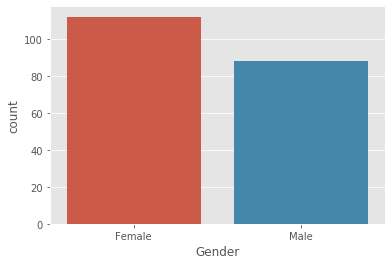

In [11]:
sns.countplot(data=df, x='Gender')
plt.show()

8. Using a pairplot, plot the distribution of our data, having a distinct color for each Gender. What can you conclude on the variable `Gender` ? 

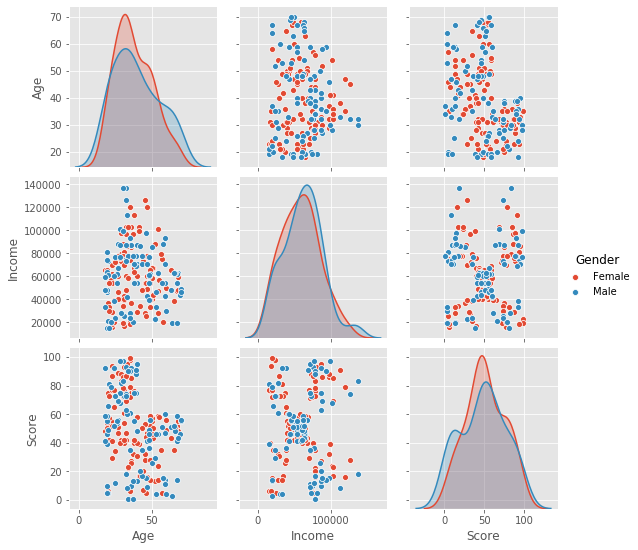

In [12]:
sns.pairplot(df, hue='Gender')
plt.show()

9. Lastly, let's check if there are any significant correlations in our data. To do so, print the correlation matrix and display a heatmap of the linear associations between features.

In [13]:
df.corr()

,Age,Income,Score
Age,1.000000,-0.012398,-0.327227
Income,-0.012398,1.000000,0.009903
Score,-0.327227,0.009903,1.000000


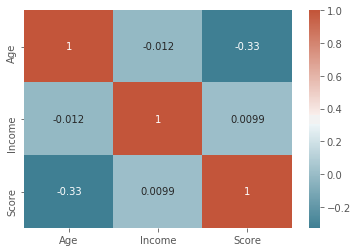

In [14]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(data=df.corr(), annot= True, cmap=cmap)

# 2. Transform

10. Create a DataFrame called `df_T` which will be a transformed copy of our data __without__ the variable `Gender`

In [15]:
df_T = df.drop(columns='Gender')
df_T.head()

,Age,Income,Score
CustomerID,,,
125,23,70000,29
63,67,47000,52
24,31,25000,73
46,24,39000,65
1,19,15000,39


11. Since __clustering works on distances__, it is very important to normalize the data!<br>
Using a Min-Max scaler, let's transform the values of our variables in a [0-1] range.<br>
_Make sure the end result is a Pandas DataFrame with all the original characteristics but with the values normalized._

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df_T)

df_scaled = pd.DataFrame(df_scaled, columns= df_T.columns, index=df_T.index)
df_scaled.head()

,Age,Income,Score
CustomerID,,,
125,0.096154,0.450820,0.285714
63,0.942308,0.262295,0.520408
24,0.250000,0.081967,0.734694
46,0.115385,0.196721,0.653061
1,0.019231,0.000000,0.387755


12. Let's also create a simple DataFrame called `df_clustered` which will be an exact copy of the initial merged data.

In [17]:
df_cluster = df.copy()
df_cluster.head()

,Gender,Age,Income,Score
CustomerID,,,,
125,Female,23,70000,29
63,Female,67,47000,52
24,Male,31,25000,73
46,Female,24,39000,65
1,Male,19,15000,39


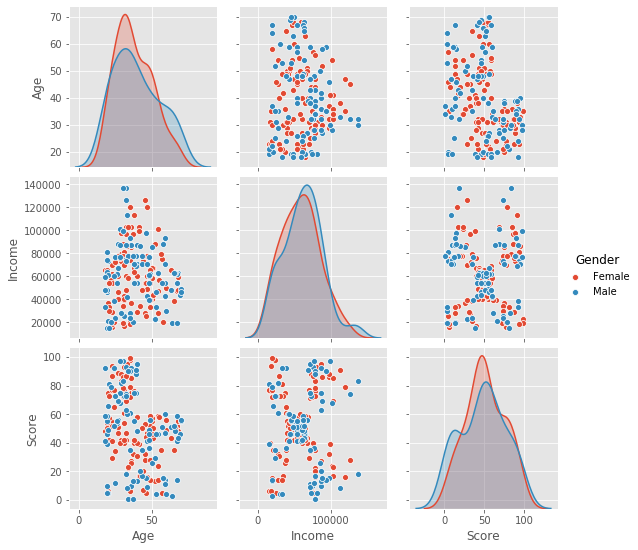

In [18]:
sns.pairplot(df, hue='Gender')
plt.show()

# 3. Clustering

## 3.1. K-Means

13. Build an initial elbow plot to evaluate the optimal number of clusters:
        1. Define a variable called nr_clusters and assign it a number between 1 and 200  
        2. Define an empty list called sse
        3. Create a loop that iterates from 1 to X clusters (choose any X you like)
            3.1. At each step, create an instance of a K-means algorithm with K clusters
            3.2. At each step, fit the K-Means algorithm to your scaled data
            3.3. At each step, append the total inertia to the sse list
        4. Build a DataFrame called df_sse with 2 columns: The list of clusters and the corresponding error
        5. Build the elbow plot: The association between number of clusters and total within sum os squared errors
        
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [19]:
from sklearn.cluster import KMeans


nr_cluster = 45
sse = []

for k in range(1, nr_cluster+1):
    model = KMeans(n_clusters= k, random_state=0)
    model.fit(df_scaled)
    sse.append(model.inertia_)

In [20]:
df_error = pd.DataFrame({'k': range(1, nr_cluster+1), 'error': sse})
df_error.head(10)

,k,error
0,1,37.401482
1,2,22.560775
2,3,17.371946
3,4,12.650288
4,5,10.303965
5,6,8.385099
6,7,7.162230
7,8,6.267042
8,9,5.490015
9,10,5.013153


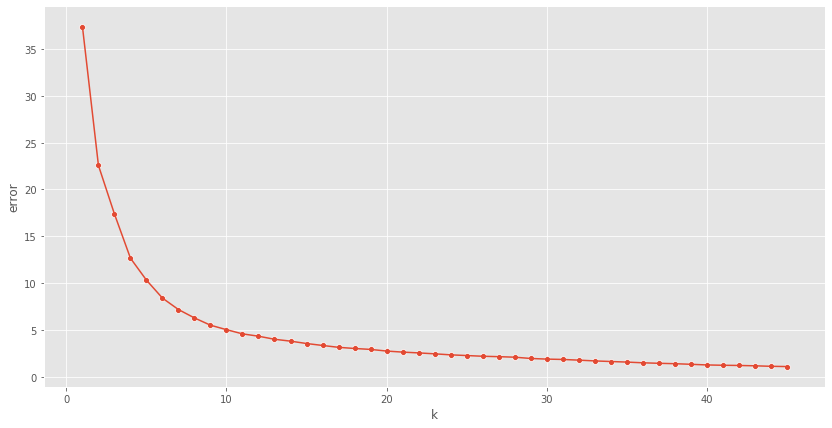

In [21]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df_error, x='k', y='error')
sns.scatterplot(data=df_error, x='k', y='error')
plt.show()

14. How many clusters do you think we should use? Create a single instance of the k-means model with that K number and fit the scaled data

In [40]:
k = 5
model = KMeans(n_clusters= k, random_state=0)
model.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

15. Print the total error

In [41]:
print(model.inertia_)

10.30396489253412


16. Using the `df_clustered`, create a new column called `cluster_kmeans` which corresponds to the labels returned by the k-means model

In [42]:
df_cluster['cluster_kmeans'] = model.labels_
df_cluster.head()

,Gender,Age,Income,Score,cluster_kmeans
CustomerID,,,,,
125,Female,23,70000,29,0
63,Female,67,47000,52,2
24,Male,31,25000,73,4
46,Female,24,39000,65,4
1,Male,19,15000,39,0


17. Calculate the centroids of each cluster

In [43]:
df_cluster.groupby('cluster_kmeans').mean()

,Age,Income,Score
cluster_kmeans,,,
0,27.061224,51979.591837,41.040816
1,44.000000,90133.333333,17.933333
2,55.551724,48482.758621,41.775862
3,32.875000,86100.000000,81.525000
4,25.521739,26304.347826,78.565217


18. What can you conclude? Use visualizations for better results _[open question]_

In [44]:
names = {0: 'Crise dos Cinquenta', 1: 'Jovens', 2: 'Com Dinheiro que Gasta', 3: 'Com Dinheiro mas não Gasta'}

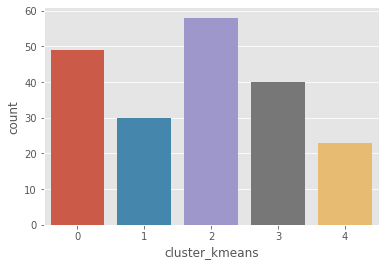

In [45]:
sns.countplot(data=df_cluster, x='cluster_kmeans')

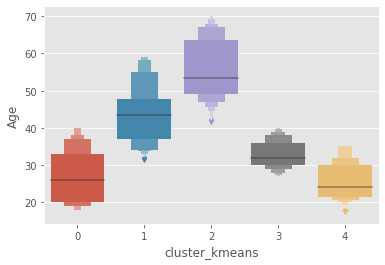

In [46]:
sns.boxenplot(data=df_cluster, x='cluster_kmeans', y='Age')

In [47]:
centroids_kmeans = df_cluster.groupby('cluster_kmeans').mean()

In [48]:
centroids_kmeans.head()

,Age,Income,Score
cluster_kmeans,,,
0,27.061224,51979.591837,41.040816
1,44.000000,90133.333333,17.933333
2,55.551724,48482.758621,41.775862
3,32.875000,86100.000000,81.525000
4,25.521739,26304.347826,78.565217


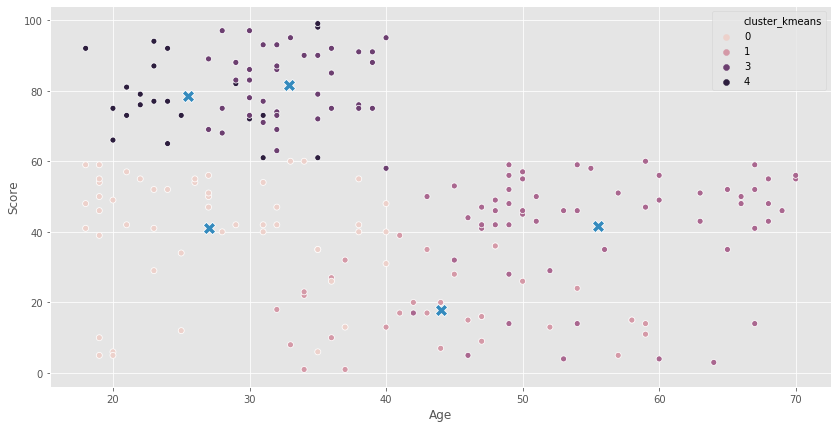

In [49]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=df_cluster, x="Age", y = "Score", hue='cluster_kmeans')
sns.scatterplot(data=centroids_kmeans, x="Age", y="Score", marker = 'X', s = 150)
plt.show()

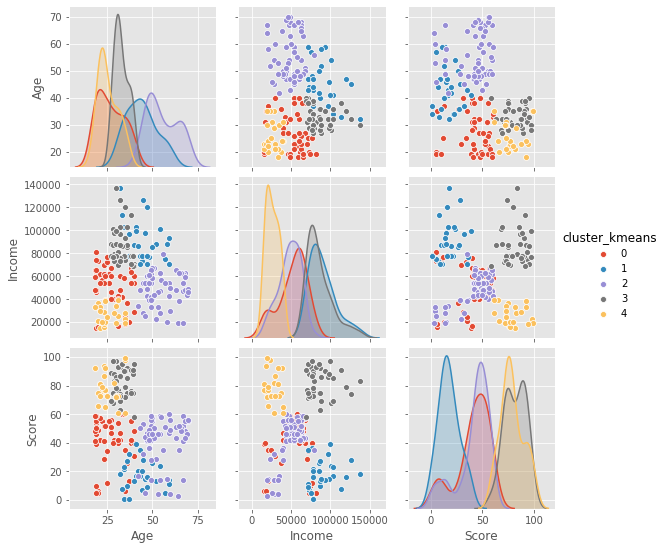

In [50]:
sns.pairplot(df_cluster, hue='cluster_kmeans')
plt.show()

Try running the code lines below, you can explore them at home

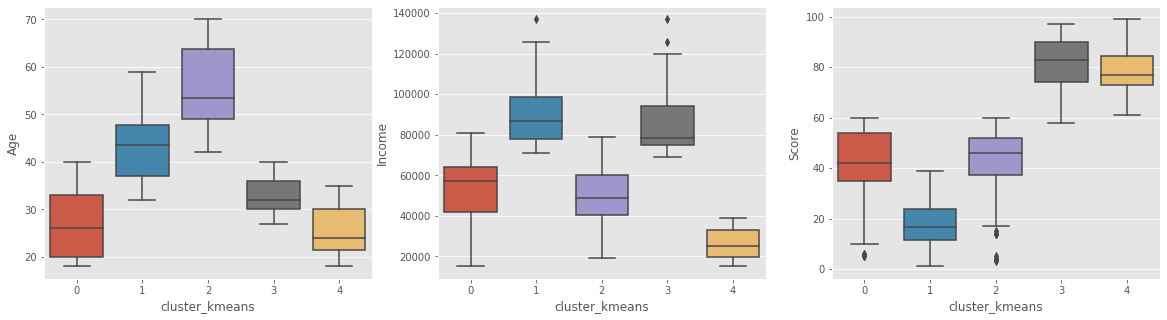

In [51]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
sns.boxplot(data = df_cluster, x = 'cluster_kmeans', y = 'Age', ax = ax[0])
sns.boxplot(data = df_cluster, x = 'cluster_kmeans', y = 'Income', ax = ax[1])
sns.boxplot(data = df_cluster, x = 'cluster_kmeans', y = 'Score', ax = ax[2])
plt.show()

## 3.2. Hierarchical Clustering

19. Now let's experiment with the Hierarchical clustering algorithm. Start by drawing the dendrogram for our scaled data using the ward linkage method
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [69]:
import scipy.cluster.hierarchy as sch

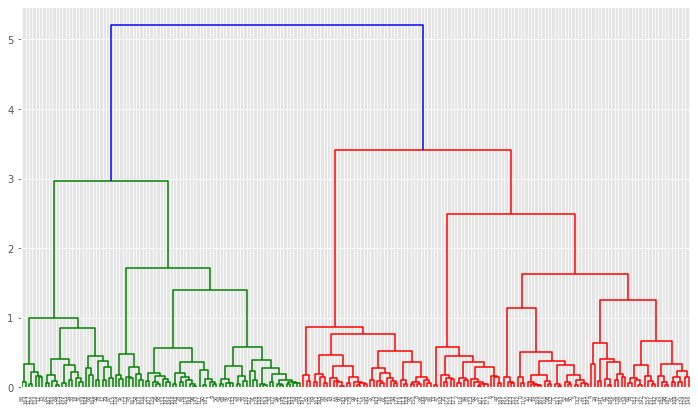

In [70]:
linkage = sch.linkage(df_scaled, method='ward')

plt.figure(figsize=(12,7))
sch.dendrogram(linkage)
plt.show()

20. What do you think its the optimal number of clusters? Assign an instance of the agglomerative clustering algorithm and fit it to your scaled data
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [71]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4)

model.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

21. Append the result labels to the `df_clustered` DataFrame in a new column called `hier_cluster`

In [74]:
df_cluster['hier_cluster'] = model.labels_
df_cluster.head()

,Gender,Age,Income,Score,cluster_kmeans,hier_cluster
CustomerID,,,,,,
125,Female,23,70000,29,3,0
63,Female,67,47000,52,0,1
24,Male,31,25000,73,1,0
46,Female,24,39000,65,1,0
1,Male,19,15000,39,1,0


22. Calculate the centroids of eachc cluster

In [75]:
df_cluster.groupby('hier_cluster')[['Age', 'Income', 'Score']].mean()

,Age,Income,Score
hier_cluster,,,
0,27.636364,43961.038961,52.311688
1,56.035714,49928.571429,41.821429
2,32.692308,86538.461538,82.128205
3,43.892857,91285.714286,16.678571


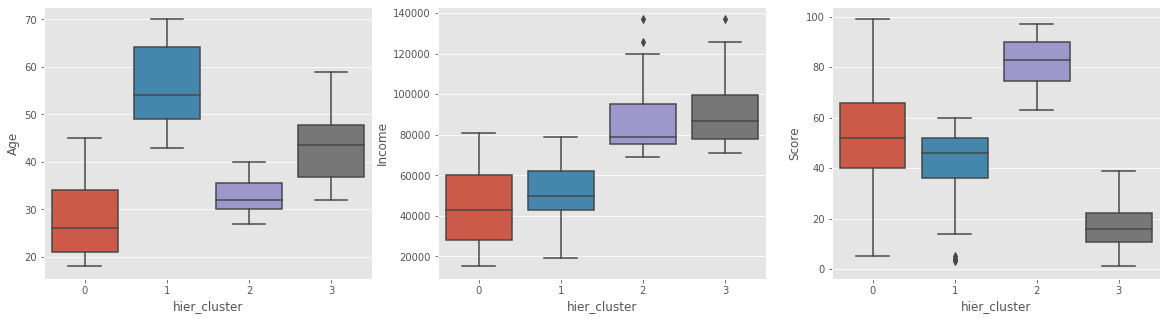

In [76]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
sns.boxplot(data = df_cluster, x = 'hier_cluster', y = 'Age', ax = ax[0])
sns.boxplot(data = df_cluster, x = 'hier_cluster', y = 'Income', ax = ax[1])
sns.boxplot(data = df_cluster, x = 'hier_cluster', y = 'Score', ax = ax[2])
plt.show()

23. What can you conclude? Use visualizations for better results [open question]

# Summary

Some useful code to retrieve from this class:

In [ ]:
'''# draw elbow plot
def plot_elbow(df, max_clusters):
    from sklearn.cluster import KMeans
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans_model = KMeans(n_clusters = k, random_state = 0)
        kmeans_model.fit(df)
        sse.append(kmeans_model.inertia_)
    df_sse = pd.DataFrame({'nr_clusters': range(1, max_clusters + 1), 'sse': sse})
    plt.figure(figsize = (12, 7))
    sns.lineplot(data = df_sse, x = 'nr_clusters', y = 'sse')
    sns.scatterplot(data = df_sse, x = 'nr_clusters', y = 'sse', marker = 'X', s = 150)
    plt.title('Elbow Plot')
    plt.ylabel('Total Within Sum of Squared Errors', fontsize = 10)
    plt.xlabel('Nr. of Clusters', fontsize = 10)
    plt.show()
    
# How to use:
# plot_elbow(df = df_scaled, max_clusters = 20)'''

In [ ]:
'''# Define k means model
from sklearn.cluster import KMeans

k = 3
model = KMeans(n_clusters = k, random_state = 0)
model.fit(x) # make sure you fit in the scaled data'''

In [ ]:
'''# draw dendrogram
def plot_dendrogram(df, linkage_method = 'ward'):
    import scipy.cluster.hierarchy as sch
    # Draw Dendrogram
    plt.figure(figsize = (10, 7))
    dendrogram = sch.dendrogram(sch.linkage(df, method  = linkage_method))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()
    
# How to use:
# plot_dendrogram(df = df_scaled, linkage_method = 'ward')'''

In [ ]:
'''# Define Hierarchical Agglomerative model

from sklearn.cluster import AgglomerativeClustering

n_clusters = 3
linkage = 'ward'
model = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = linkage)
model = model.fit(x)'''